__Import__

In [1]:
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

import pygmo as pg

__Definition des Problems und der Population__

* Erstellen Sie ein 75-dimensionales [Rosenbrock-Problem](https://esa.github.io/pygmo2/problems.html#pygmo.rosenbrock) indem Sie das Objekt dem Konstruktor von `pg.problem` übergeben
* Speichern Sie das Problem in der Variablen `prob_i`

<!--
nDim = 75
prob_i = pg.problem(pg.rosenbrock(dim = 75))
-->

In [2]:
nDim = 75
prob_i = pg.problem(pg.rosenbrock(dim = 75))

* Erstellen Sie eine Population aus `10` Individuen über [diesen](https://esa.github.io/pygmo2/population.html#pygmo.population) Konstruktor
* Speichern Sie die Population in der Variablen `pop_i` ab

<!--
nPop = 10
pop_i = pg.population(prob_i, size = nPop)
-->

In [3]:
nPop = 10
pop_i = pg.population(prob_i, size = nPop)

__Serielle Optimierung__

* Schreiben Sie die Funktion `serOpt` mit `nIter`, `pop` und `algo` als Eingangsargumente
* Der Rückgabewert soll ein `float`-Vektor mit der Dimension `nIter x 2` sein
* Optimieren Sie die Population durch die [evolve](https://esa.github.io/pygmo2/algorithm.html#pygmo.algorithm.evolve)-Funtion über `nIter` Iterationen
* Speichern Sie das Minimum aus dem `property` [champion_f](https://esa.github.io/pygmo2/population.html#pygmo.population.champion_f) im Rückgabevektor für jede Iteration ab

<!--
def serOpt(nIter, pop, algo):
    genFit = np.zeros( (nIter,2), float )
    for i in range(nIter):
      pop = algo.evolve( pop )
      minF = np.min(pop.champion_f)
      genFit[i, 0] = i
      genFit[i, 1] = minF    
    return genFit
-->

In [4]:
def serOpt(nIter, pop, algo):
    genFit = np.zeros( (nIter,2), float )
    for i in range(nIter):
      pop = algo.evolve( pop )
      minF = np.min(pop.champion_f)
      genFit[i, 0] = i
      genFit[i, 1] = minF    
    return genFit

* Erstellen Sie eine Abbildung durch `plt.figure(1)`
* Führen Sie 6 Optimierungsläufe durch den Aufruf der Funktion `serOpt` durch
* Verwenden Sie die Population `pop_i` als Startpopulation
* Verwenden Sie den [`de`](https://esa.github.io/pygmo2/algorithms.html#pygmo.de)-Algorithmus zur Optimierung
* Optimieren Sie insgesamt für `nGenIter=1500` Iterationen und verwenden Sie `nGen=10` Generationen je Iterationen
* Speichern Sie für jeden Optimierungslauf das Endergebnis im Vektor `gMinSerVec`
* Plotten Sie jeden Optimierungslauf in die Abbildung durch den Befehl [`semilogy`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogy.html?highlight=semilogy#matplotlib.pyplot.semilogy) aus `plt`; verwenden Sie dazu den Rückgabevektor der Funktion `serOpt`

<!--
plt.figure(1)
nGen = 10
nGenIter = 1500
gMinSerVec = np.zeros(6, float)
for j in range(np.size(gMinSerVec)):
  genFit = serOpt(nGenIter, pop_i, pg.algorithm(pg.de(gen=nGen)))
  gMinSerVec[j] = genFit[-1,1]
  print( "Run %5d / minF = %8.4e" % (j, gMinSerVec[j]) )
  plt.semilogy( genFit[:,0], genFit[:,1], 'k-' )
-->

<IPython.core.display.Javascript object>


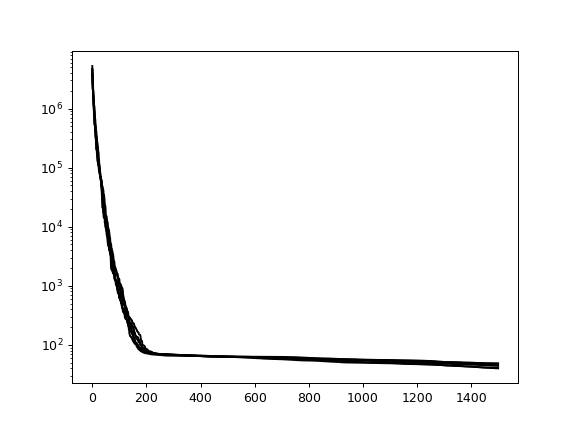

Run     0 / minF = 4.4039e+01
Run     1 / minF = 4.8363e+01
Run     2 / minF = 4.5220e+01
Run     3 / minF = 4.0612e+01
Run     4 / minF = 3.9983e+01
Run     5 / minF = 4.8201e+01


In [5]:
plt.figure(1)
nGen = 10
nGenIter = 1500
gMinSerVec = np.zeros(6, float)
for j in range(np.size(gMinSerVec)):
  genFit = serOpt(nGenIter, pop_i, pg.algorithm(pg.de(gen=nGen)))
  gMinSerVec[j] = genFit[-1,1]
  print( "Run %5d / minF = %8.4e" % (j, gMinSerVec[j]) )
  plt.semilogy( genFit[:,0], genFit[:,1], 'k-' )

__Parallele Optimierung__

* Erstellen Sie eine zweite Abbildung durch `plt.figure(2)`
* Berechnen Sie den Mittelwert aller seriellen Optimierungen (Vektor `gMinSerVec`) und speichern Sie das Ergebnis in `meanFit`
* Plotten Sie die seriellen Optimierungen in das Schaubild durch:
    ```python
    plt.loglog(np.ones(np.size(gMinSerVec), int), gMinSerVec/meanFit, 'k.')
    ```
* Beschränken Sie die Abszisse durch
    ```python
    plt.xlim([0.9,6])
    ```
    
<!--
plt.figure(2)
plt.clf()
meanFit = np.mean(gMinSerVec)
plt.loglog(np.ones(np.size(gMinSerVec), int), gMinSerVec/meanFit, 'k.')
plt.xlim([0.9,6])
-->

<IPython.core.display.Javascript object>


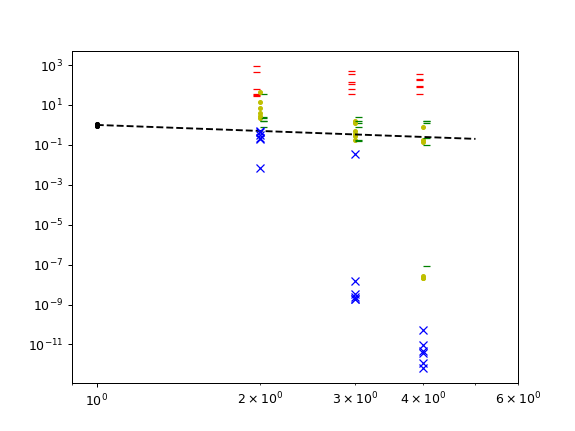

(0.9, 6)

In [6]:
plt.figure(2)
plt.clf()
meanFit = np.mean(gMinSerVec)
plt.loglog(np.ones(np.size(gMinSerVec), int), gMinSerVec/meanFit, 'k.')
plt.xlim([0.9,6])

* Kopieren Sie die Funktion `parOpt`:
    ```python
    def parOpt(nIter, pop, algo, nIsland, topo, nEvolves):
      nGenIterPar = int(nIter/nEvolves)
      genFit = np.zeros( (nGenIterPar,2), float )
      archi = pg.archipelago(t=topo)

      for i in range(nIsland):
        algo.set_seed(np.random.randint(0,10000))
        archi.push_back( pg.island(algo=algo, pop=pop) )    
      for i in range(nGenIterPar):
        archi.evolve(nEvolves)
        archi.wait()
        minF = np.min(archi.get_champions_f())
        genFit[i, 0] = i*nGen*nEvolves
        genFit[i, 1] = minF
      return genFit    
    ```
* Die Funktion führt eine parallele Optimierung auf `nIsland` Inseln durch
* Das Argument `topo` entspricht der [Topologie](https://esa.github.io/pygmo2/topology.html)
* Das Argument `nEvolves` ist das Migrationsintervall
* Der Rückgabewert ist gleich wie beim seriellen Fall und entspricht damit dem in jedem Iterationsschritt besten Fitnesswert

<!--
def parOpt(nIter, pop, algo, nIsland, topo, nEvolves):
  nGenIterPar = int(nIter/nEvolves)
  genFit = np.zeros( (nGenIterPar,2), float )
  archi = pg.archipelago(t=topo)

  for i in range(nIsland):
    #algo.set_seed(np.random.randint(0,10000))
    archi.push_back( pg.island(algo=algo, pop=pop) )    
  for i in range(nGenIterPar):
    archi.evolve(nEvolves)
    archi.wait()
    minF = np.min(archi.get_champions_f())
    genFit[i, 0] = i*nGen*nEvolves
    genFit[i, 1] = minF
  return genFit
-->

In [7]:
def parOpt(nIter, pop, algo, nIsland, topo, nEvolves):
  nGenIterPar = int(nIter/nEvolves)
  genFit = np.zeros( (nGenIterPar,2), float )
  archi = pg.archipelago(t=topo)

  for i in range(nIsland):
    #algo.set_seed(np.random.randint(0,10000))
    archi.push_back( pg.island(algo=algo, pop=pop) )    
  for i in range(nGenIterPar):
    archi.evolve(nEvolves)
    archi.wait()
    minF = np.min(archi.get_champions_f())
    genFit[i, 0] = i*nGen*nEvolves
    genFit[i, 1] = minF
  return genFit

* Führen Sie die parallele Optimierung jeweils 6 Mal auf 2, 3 und 4 Inseln durch
* Testen Sie für jede Inselanzahl ein Migrationsintervall von 1, 3 und 5
* Verwenden Sie als Topologie entweder [diese](https://esa.github.io/pygmo2/topologies.html#pygmo.fully_connected) oder [diese](https://esa.github.io/pygmo2/topologies.html#pygmo.ring)
* Die Gesamtzahl der Iterationen, die Startpopulation und der Algorithmus soll gleich wie bei der seriellen Optimierung sein
* Vervollständigen Sie dazu folgenden Quellcode:
    ```python
    nIslandVec = [2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4]
    for nIsland in nIslandVec:
      col = ['r', 'y', 'g']
      mark = [0, "." ,1]
      j = 0
      for nEvolves in [1,3,5]:        
        genFit = parOpt([...])
        print( "nIsland = %2d / nEvolves = %2d / minF = %8.4e" % (nIsland, nEvolves, genFit[-1,1]) )   
        plt.figure(2)
        plt.loglog(nIsland, genFit[-1,1]/meanFit, col[j], marker=mark[j])
        j = j+1
    ```
    
<!--
nIslandVec = [2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4]
for nIsland in nIslandVec:
  col = ['r', 'y', 'g']
  mark = [0, "." ,1]
  j = 0
  for nEvolves in [1,3,5]:        
    genFit = parOpt(nGenIter, pop_i, pg.algorithm( pg.de(gen=nGen) ), nIsland, pg.topology(pg.ring()), nEvolves)
    print( "nIsland = %2d / nEvolves = %2d / minF = %8.4e" % (nIsland, nEvolves, genFit[-1,1]) )   
    plt.figure(2)
    plt.loglog(nIsland, genFit[-1,1]/meanFit, col[j], marker=mark[j])
    j = j+1
-->

In [8]:
nIslandVec = [2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4]
for nIsland in nIslandVec:
  col = ['r', 'y', 'g']
  mark = [0, "." ,1]
  j = 0
  for nEvolves in [1,3,5]:        
    genFit = parOpt(nGenIter, pop_i, pg.algorithm( pg.de(gen=nGen) ), nIsland, pg.topology(pg.ring()), nEvolves)
    print( "nIsland = %2d / nEvolves = %2d / minF = %8.4e" % (nIsland, nEvolves, genFit[-1,1]) )   
    plt.figure(2)
    plt.loglog(nIsland, genFit[-1,1]/meanFit, col[j], marker=mark[j])
    j = j+1

nIsland =  2 / nEvolves =  1 / minF = 2.0365e+04
nIsland =  2 / nEvolves =  3 / minF = 1.0078e+02
nIsland =  2 / nEvolves =  5 / minF = 1.0197e+02
nIsland =  2 / nEvolves =  1 / minF = 1.5777e+03
nIsland =  2 / nEvolves =  3 / minF = 3.1295e+02
nIsland =  2 / nEvolves =  5 / minF = 7.3978e+01
nIsland =  2 / nEvolves =  1 / minF = 1.1836e+03
nIsland =  2 / nEvolves =  3 / minF = 5.9402e+02
nIsland =  2 / nEvolves =  5 / minF = 1.1739e+02
nIsland =  2 / nEvolves =  1 / minF = 1.4491e+03
nIsland =  2 / nEvolves =  3 / minF = 1.2764e+02
nIsland =  2 / nEvolves =  5 / minF = 1.6097e+03
nIsland =  2 / nEvolves =  1 / minF = 4.0091e+04
nIsland =  2 / nEvolves =  3 / minF = 1.7504e+02
nIsland =  2 / nEvolves =  5 / minF = 3.4558e+01
nIsland =  2 / nEvolves =  1 / minF = 2.7918e+03
nIsland =  2 / nEvolves =  3 / minF = 1.9236e+03
nIsland =  2 / nEvolves =  5 / minF = 6.9093e+01
nIsland =  3 / nEvolves =  1 / minF = 1.5314e+04
nIsland =  3 / nEvolves =  3 / minF = 7.6077e+00
nIsland =  3 / nEvol

__Skalierung der Parallelisierung__

* Plotten Sie in Abbildung 2 zusätzlich die "ideale" Skalierung (siehe [Folie 18](https://ilias3.uni-stuttgart.de/goto_Uni_Stuttgart_file_2539386_download.html))

<!--
plt.loglog([1,5], np.mean(gMinSerVec/meanFit) * np.array([1., 1./5.]), 'k--')
-->

In [9]:
plt.loglog([1,5], np.mean(gMinSerVec/meanFit) * np.array([1., 1./5.]), 'k--')

* Führen Sie erneut eine serielle Optimierung durch
* Ändern Sie die Anzahl der Iterationen auf `2*nGenIter`, `3*nGenIter` und `4*nGenIter`
* Führen Sie für jede neue Anzahl die Optimierung jeweils 6 Mal durch
* Plotten Sie die Ergebnisse in die Abbildung 2

<!--
for nPseudoIsl in nIslandVec:
  genFit = serOpt(nPseudoIsl*nGenIter, pop_i, pg.algorithm(pg.de(gen=nGen)))
  print( "nPseudoIsl = %5d / minF = %8.4e" % (nPseudoIsl, genFit[-1,1]) )
  plt.figure(2)
  plt.semilogy( nPseudoIsl, genFit[-1,1]/meanFit, 'bx' )
-->

In [10]:
for nPseudoIsl in nIslandVec:
  genFit = serOpt(nPseudoIsl*nGenIter, pop_i, pg.algorithm(pg.de(gen=nGen)))
  print( "nPseudoIsl = %5d / minF = %8.4e" % (nPseudoIsl, genFit[-1,1]) )
  plt.figure(2)
  plt.semilogy( nPseudoIsl, genFit[-1,1]/meanFit, 'bx' )

nPseudoIsl =     2 / minF = 9.6815e+00
nPseudoIsl =     2 / minF = 8.6773e+00
nPseudoIsl =     2 / minF = 2.1461e+01
nPseudoIsl =     2 / minF = 1.9690e+01
nPseudoIsl =     2 / minF = 3.1834e-01
nPseudoIsl =     2 / minF = 1.4198e+01
nPseudoIsl =     3 / minF = 6.9759e-07
nPseudoIsl =     3 / minF = 8.1952e-08
nPseudoIsl =     3 / minF = 1.5629e+00
nPseudoIsl =     3 / minF = 1.1170e-07
nPseudoIsl =     3 / minF = 1.4278e-07
nPseudoIsl =     3 / minF = 8.6552e-08
nPseudoIsl =     4 / minF = 2.0807e-10
nPseudoIsl =     4 / minF = 2.2600e-09
nPseudoIsl =     4 / minF = 1.6687e-10
nPseudoIsl =     4 / minF = 2.8017e-11
nPseudoIsl =     4 / minF = 5.3656e-11
nPseudoIsl =     4 / minF = 3.9445e-10


__Beobachtungen__

* Warum sind die Ergebnisse zwischen dem "langen" seriellen und dem parallelen Lauf nicht gleich?
* Bis zu welcher Anzahl von Inseln würden Sie empfehlen parallel zu optimieren?
* Warum unterscheiden sich die parallelen Läufe auf einer jeweiligen Inselanzahl im Endergebnis?

In [12]:
for i in range(5):
    print(i)
    

0
1
2
3
4
